# Sales Analysis

### Import necessary libraries

In [62]:
import pandas as pd
import os

### Merge data from each month into one CSV

In [63]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data') if not file.startswith('.')] 

mergeData = pd.DataFrame()

for file in files:
    curr_data = pd.read_csv('./SalesAnalysis/Sales_Data/'+file)
    mergeData = pd.concat([mergeData,curr_data])
    
mergeData.to_csv('all_data.csv',index=False)

### Read in updated dataframe

In [64]:
all_data = pd.read_csv('all_data.csv')
print(all_data.count())

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64


### Clean up the data

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [65]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Get rid of text in order date column

In [66]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
print(all_data.head())

  Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301  


##### Make columns correct type

In [67]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

##### Augment data with additional columns

Add month column

In [68]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month

print(all_data.head())

/var/folders/2q/n7vgjd694zd8pxztn7p8fd140000gn/T/ipykernel_90457/3977751181.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


  Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month  
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12  
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12  


##### Add city column

In [70]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

print(all_data.head())

  Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month  \
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12   
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12   
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12   
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12   
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12   

                 City  
0  New York City (NY)  
1  New York City (NY)  
2  New York City (NY)  
3  San Francisco (CA)  
4        Atlanta (GA)  


### Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [72]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

all_data.groupby(['Month']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",Dallas (TX)New York City (NY)New York City (NY...,1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",Portland (ME)San Francisco (CA)New York City (...,2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",San Francisco (CA)Portland (OR)San Francisco (...,2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",Dallas (TX)Boston (MA)Los Angeles (CA)Los Ange...,3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",Portland (OR)San Francisco (CA)Boston (MA)Bost...,3152606.75
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",San Francisco (CA)Dallas (TX)San Francisco (CA...,2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",Atlanta (GA)Seattle (WA)Atlanta (GA)Atlanta (G...,2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",Seattle (WA)Dallas (TX)Portland (OR)Los Angele...,2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",San Francisco (CA)San Francisco (CA)Seattle (W...,2097560.13


#### using plt show the sales

In [ ]:
import matplotlib.pyplot as plt

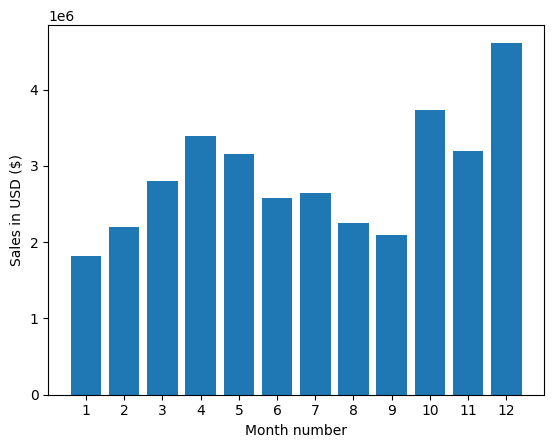

In [77]:
months = range(1,13)

plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


#### Question 2: What city sold the most product?

In [89]:
citySales =  pd.DataFrame(all_data.groupby(['City'])['Sales'].sum())

Index(['Atlanta (GA)', 'Austin (TX)', 'Boston (MA)', 'Dallas (TX)',
       'Los Angeles (CA)', 'New York City (NY)', 'Portland (ME)',
       'Portland (OR)', 'San Francisco (CA)', 'Seattle (WA)'],
      dtype='object', name='City')


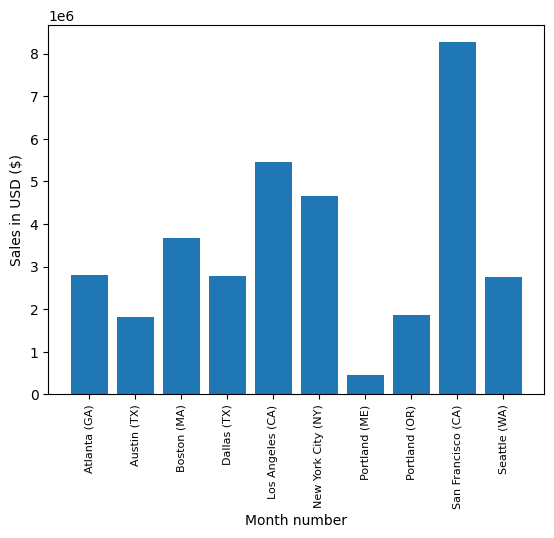

In [91]:
plt.bar(citySales.index,citySales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(citySales.index, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [92]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

/var/folders/2q/n7vgjd694zd8pxztn7p8fd140000gn/T/ipykernel_90457/3943995571.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
/var/folders/2q/n7vgjd694zd8pxztn7p8fd140000gn/T/ipykernel_90457/3943995571.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95,12,38,1


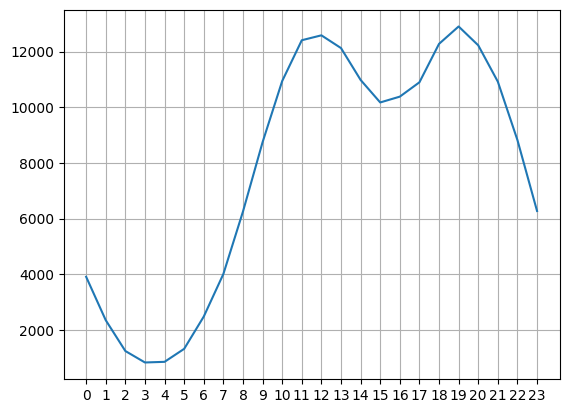

In [98]:
counts = pd.DataFrame(all_data.groupby(['Hour'])['Count'].count())

plt.plot(counts.index, counts['Count'])
plt.xticks(counts.index)
plt.grid()
plt.show()


#### Question 4: What products are most often sold together?

In [102]:
idf = all_data[all_data['Order ID'].duplicated(keep=False)]
idf['Grouped'] = idf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
print(idf.head())

   Order ID                     Product  Quantity Ordered  Price Each  \
16   295681                Google Phone                 1      600.00   
17   295681        USB-C Charging Cable                 1       11.95   
18   295681  Bose SoundSport Headphones                 1       99.99   
19   295681            Wired Headphones                 1       11.99   
36   295698             Vareebadd Phone                 1      400.00   

        Order Date                     Purchase Address  Month  \
16  12/25/19 12:37          79 Elm St, Boston, MA 02215     12   
17  12/25/19 12:37          79 Elm St, Boston, MA 02215     12   
18  12/25/19 12:37          79 Elm St, Boston, MA 02215     12   
19  12/25/19 12:37          79 Elm St, Boston, MA 02215     12   
36  12/13/19 14:32  175 1st St, New York City, NY 10001     12   

                  City   Sales  Hour  Minute  Count  \
16         Boston (MA)  600.00    12      37      1   
17         Boston (MA)   11.95    12      37      1   

/var/folders/2q/n7vgjd694zd8pxztn7p8fd140000gn/T/ipykernel_90457/1287700618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['Grouped'] = idf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
